<a href="https://colab.research.google.com/github/OmdenaAI/omdena-nigeria-foodsecurity/blob/main/src/tasks/task-3-crop-disease-detection/baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baseline Model

Our baseline model is a 2-layer CNN applied with data augmentation.

Steps to build our model.

1.   Image Preprocessing
      * Convert to array
      * Normalize (1./255)

2.   Image Augmentation using Keras Image Data Generator
3.   Model Building
      * Conv2D
      * Conv2D
      * Conv2D
      * Flatten
      * Dense with softmax activation as output



In [1]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
import numpy as np

In [2]:
train_path = '/content/drive/MyDrive/Omdena/Osun Nigeria/Data/Maize Images/data/train'
test_path = '/content/drive/MyDrive/Omdena/Osun Nigeria/Data/Maize Images/data/test'

In [3]:
# VARIABLES

TARGET_SIZE = (224, 224)
BATCH_SIZE = 30
EPOCHS = 25

LEARNING_RATE = 0.001

# Image Preprocessing

In [4]:
def preprocess(image):
  img = cv2.GaussianBlur(image,(5,5),0)
  return img_to_array(img)

## Image Augmentation

In [5]:
train_generator = ImageDataGenerator(rescale=1.0/255,
                             rotation_range=25,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             brightness_range=[0.2, 0.8],
                             validation_split=0.1,
                             preprocessing_function=preprocess)

valid_generator = ImageDataGenerator(rescale=1./255,
                                     validation_split = 0.1,
                                   preprocessing_function=preprocess)

test_generator = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=preprocess)

In [6]:
train_generated = train_generator.flow_from_directory(directory = train_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    subset = 'training')

validation_generated = valid_generator.flow_from_directory(directory = train_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    subset = 'validation')

test_generated = valid_generator.flow_from_directory(directory = test_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE)

Found 3016 images belonging to 4 classes.
Found 332 images belonging to 4 classes.
Found 840 images belonging to 4 classes.


## Model Specification

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [8]:
def build_model():
  model = Sequential()
  model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(224, 224, 3), padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(10, kernel_size=2, activation='relu', padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Flatten())
  model.add(Dense(4, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate = LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [9]:
model = build_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 10)      130       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 10)      410       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 31360)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 125444    
Total params: 125,984
Trainable params: 125,984
Non-trainable params: 0
__________________________________________________

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Omdena/Osun Nigeria/Model/baseline_weights_6.hdf5', monitor='val_loss', save_best_only=True)
#early_stop = EarlyStopping(monitor='val_loss', patience=4)

callbacks = [checkpoint]


In [13]:
history = model.fit(train_generated,
                    steps_per_epoch=len(train_generated)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generated,
                    verbose=2,
                    shuffle=True,
                    callbacks = callbacks)

Epoch 1/25
3/3 - 102s - loss: 1.6082 - accuracy: 0.2667 - val_loss: 1.2588 - val_accuracy: 0.2771
Epoch 2/25
3/3 - 28s - loss: 1.4957 - accuracy: 0.3000 - val_loss: 1.6213 - val_accuracy: 0.3855
Epoch 3/25
3/3 - 26s - loss: 1.2953 - accuracy: 0.5556 - val_loss: 1.1080 - val_accuracy: 0.4699
Epoch 4/25
3/3 - 24s - loss: 1.2215 - accuracy: 0.5111 - val_loss: 0.9633 - val_accuracy: 0.6054
Epoch 5/25
3/3 - 26s - loss: 1.1586 - accuracy: 0.5222 - val_loss: 1.1332 - val_accuracy: 0.5904
Epoch 6/25
3/3 - 24s - loss: 1.0816 - accuracy: 0.5444 - val_loss: 0.9417 - val_accuracy: 0.6536
Epoch 7/25
3/3 - 25s - loss: 0.8990 - accuracy: 0.7222 - val_loss: 0.8844 - val_accuracy: 0.6627
Epoch 8/25
3/3 - 21s - loss: 0.8824 - accuracy: 0.6778 - val_loss: 0.7624 - val_accuracy: 0.7139
Epoch 9/25
3/3 - 26s - loss: 0.8198 - accuracy: 0.7444 - val_loss: 0.6621 - val_accuracy: 0.7440
Epoch 10/25
3/3 - 20s - loss: 0.7922 - accuracy: 0.7222 - val_loss: 0.6762 - val_accuracy: 0.7229
Epoch 11/25
3/3 - 20s - loss

In [14]:
import matplotlib.pyplot as plt

In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


In [16]:
def plot_acc(train_acc, val_acc):
  plt.figure()
  plt.plot(train_acc)
  plt.plot(val_acc)
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'upper right')
  plt.show()

In [17]:
def plot_loss(train_loss, val_loss):
  plt.figure()
  plt.plot(train_loss)
  plt.plot(val_loss)
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')
  plt.show()

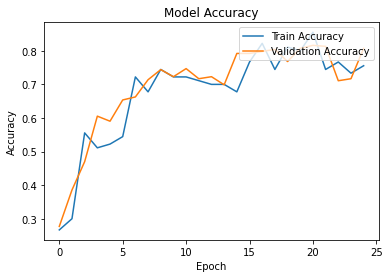

In [18]:
plot_acc(train_acc, val_acc)

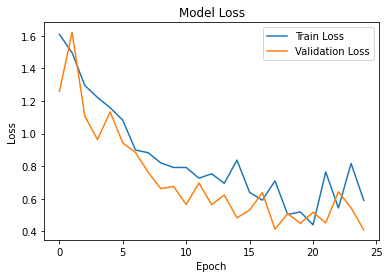

In [19]:
plot_loss(train_loss, val_loss)

In [20]:
# evaluate the model

acc = history.model.evaluate(test_generated)
acc

28/28 [==============================] - 199s 7s/step - loss: 0.4812 - accuracy: 0.8036


[0.4811790883541107, 0.8035714030265808]

In [21]:
new_model = build_model()
new_model.load_weights('/content/drive/MyDrive/Omdena/Osun Nigeria/Model/baseline_weights_6.hdf5')

In [22]:
predictions = new_model.predict(test_generated)

In [25]:
# import classification_report
from sklearn.metrics import classification_report

test_labels = test_generated.classes
test_label_name = [cls for cls in test_generated.class_indices.keys()]
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=test_label_name))

                precision    recall  f1-score   support

        Blight       0.29      0.40      0.34       230
   Common_Rust       0.30      0.31      0.31       262
Gray_Leaf_Spot       0.00      0.00      0.00       115
       Healthy       0.30      0.33      0.31       233

      accuracy                           0.30       840
     macro avg       0.22      0.26      0.24       840
  weighted avg       0.26      0.30      0.27       840



In [29]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(test_labels, predictions.argmax(axis=1))
print(result)

[[91 84  0 55]
 [94 82  1 85]
 [42 37  0 36]
 [84 71  2 76]]


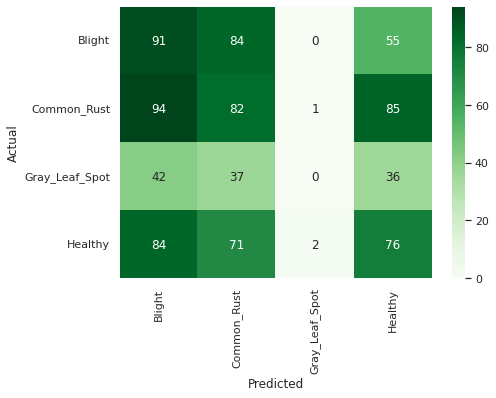

In [48]:
import seaborn as sns
import pandas as pd

result_df = pd.DataFrame(result, columns=test_label_name, index = test_label_name)
result_df.index.name = 'Actual'
result_df.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sns.set(font_scale=1)
sns.heatmap(result_df, cmap='Greens', annot=True,annot_kws={"size": 12})